# Banknote Dataset:
The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

1)Variance of Wavelet Transformed image (continuous)

2)Skewness of Wavelet Transformed image (continuous).

3)Kurtosis of Wavelet Transformed image (continuous).

4)Entropy of image (continuous).

5)Class (0 for authentic, 1 for inauthentic)



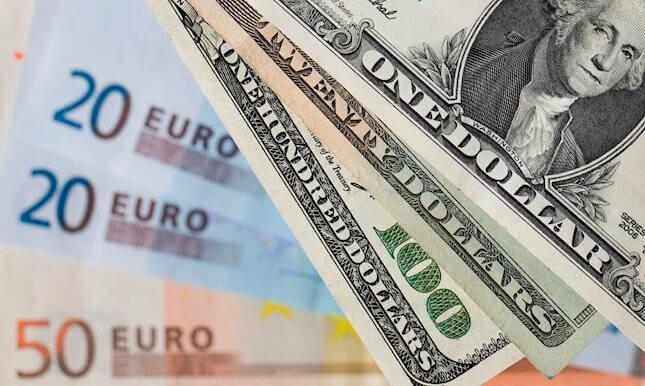

In [2]:
Image(filename="C:\\Users\\SHIVAPRASAD\\Desktop\\image\\bank.jpg",width=400,height=200)

## Import the Libraries

In [1]:
#load the libraries
from pandas import read_excel
from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from pickle import dump
from pickle import load
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from IPython.display import Image

##  Load the Dataset

In [3]:
# Loading the dataset
filename="C:\\Users\\SHIVAPRASAD\\Desktop\\datasets\\bank.xlsx"
names = ['Variance of Wavelet','Skewness of Wavelet','Kurtosis of Wavelet','Entropy of image','class']
df=read_excel(filename, names=names)

##  Summarizing the Dataset

In [4]:
#shape
print df.shape 

(1371, 5)


In [5]:
#Head
print df.head()

   Variance of Wavelet  Skewness of Wavelet  Kurtosis of Wavelet  \
0              4.54590               8.1674              -2.4586   
1              3.86600              -2.6383               1.9242   
2              3.45660               9.5228              -4.0112   
3              0.32924              -4.4552               4.5718   
4              4.36840               9.6718              -3.9606   

   Entropy of image  class  
0          -1.46210      0  
1           0.10645      0  
2          -3.59440      0  
3          -0.98880      0  
4          -3.16250      0  


In [6]:
#Tail
print df.tail()

      Variance of Wavelet  Skewness of Wavelet  Kurtosis of Wavelet  \
1366              0.40614              1.34920              -1.4501   
1367             -1.38870             -4.87730               6.4774   
1368             -3.75030            -13.45860              17.5932   
1369             -3.56370             -8.38270              12.3930   
1370             -2.54190             -0.65804               2.6842   

      Entropy of image  class  
1366          -0.55949      1  
1367           0.34179      1  
1368          -2.77710      1  
1369          -1.28230      1  
1370           1.19520      1  


In [7]:
#statistical summary
print (df.describe())

       Variance of Wavelet  Skewness of Wavelet  Kurtosis of Wavelet  \
count          1371.000000          1371.000000          1371.000000   
mean              0.431410             1.917434             1.400694   
std               2.842494             5.868359             4.310105   
min              -7.042100           -13.773100            -5.286100   
25%              -1.774700            -1.711300            -1.553350   
50%               0.495710             2.313400             0.616630   
75%               2.814650             6.813100             3.181600   
max               6.824800            12.951600            17.927400   

       Entropy of image        class  
count       1371.000000  1371.000000  
mean          -1.192200     0.444931  
std            2.101683     0.497139  
min           -8.548200     0.000000  
25%           -2.417000     0.000000  
50%           -0.586650     0.000000  
75%            0.394810     1.000000  
max            2.449500     1.000000  


## Visualization

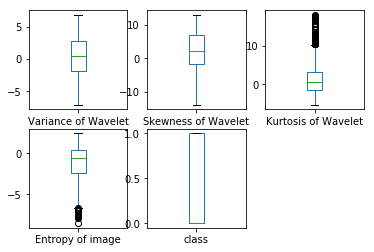

In [8]:
#Box and the whisker plots
df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False) 
pyplot.show()

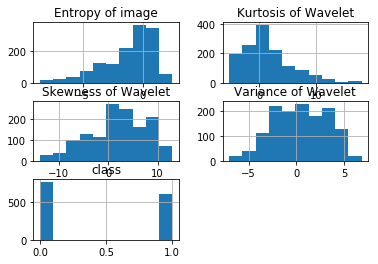

In [9]:
#Histograms
df.hist()
pyplot.show()

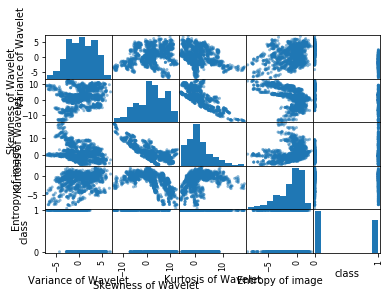

In [10]:
# scatter plot matrix
scatter_matrix(df)
pyplot.show()  

## Standardizing the Dataset
It is a useful technique to transform attributes with gaussian distribution and differing means and standard deviation to a standard Gaussian distribution with mean of 0 and standard devition of 1.

In [11]:
#standardizing the Dataset

array = df.values

# separate array into input and output components
X = array[:,0:4]
Y = array[:,4]
scaler = StandardScaler().fit(X) 

rescaledX = scaler.fit_transform(X) 

set_printoptions(precision=3)     
print(rescaledX[0:5,:])



[[ 1.448  1.065 -0.896 -0.128]
 [ 1.209 -0.777  0.122  0.618]
 [ 1.065  1.296 -1.256 -1.143]
 [-0.036 -1.086  0.736  0.097]
 [ 1.386  1.322 -1.244 -0.938]]


## Evaluate some Algorithms

In [12]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20       
seed = 7                   
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print Y



[ 0.  0.  0. ...,  1.  1.  1.]


## Compare Machine Learning Algorithms

In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')#"cross_val_score" splits the data into say 5 folds. Then for each fold it fits the data on 4 folds and scores the 5th fold
	results.append(cv_results)
	names.append(name)
	msg = "%s = %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR = 0.989950 (0.013864)
LDA = 0.978057 (0.022152)
KNN = 1.000000 (0.000000)
CART = 0.978991 (0.013618)
NB = 0.833928 (0.028628)
SVM = 1.000000 (0.000000)


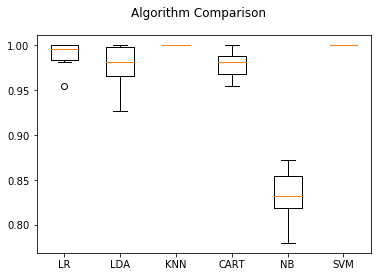

In [17]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Confusion matrix and Classification report

In [22]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print Y_validation
print predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[ 0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.
  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  1.  0.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.
  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.  1.
  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0

## Finalizing the model with pickle

In [23]:
#finalizing the model
array = df.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))
# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test)
print"Acuracy =",(result*100)

Acuracy = 99.1169977925
